In [1]:
import os

import torch

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

import warnings
warnings.filterwarnings('ignore')

/home/agiottonini/miniconda3/envs/mes2therm/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
LRs = ["0.00001", "0.00004", "0.0001", "0.0004", "0.001", "0.004"]
BSs = ["64", "128", "256", "512"]
Ps = ["0.15", "0.10", "0.05"]

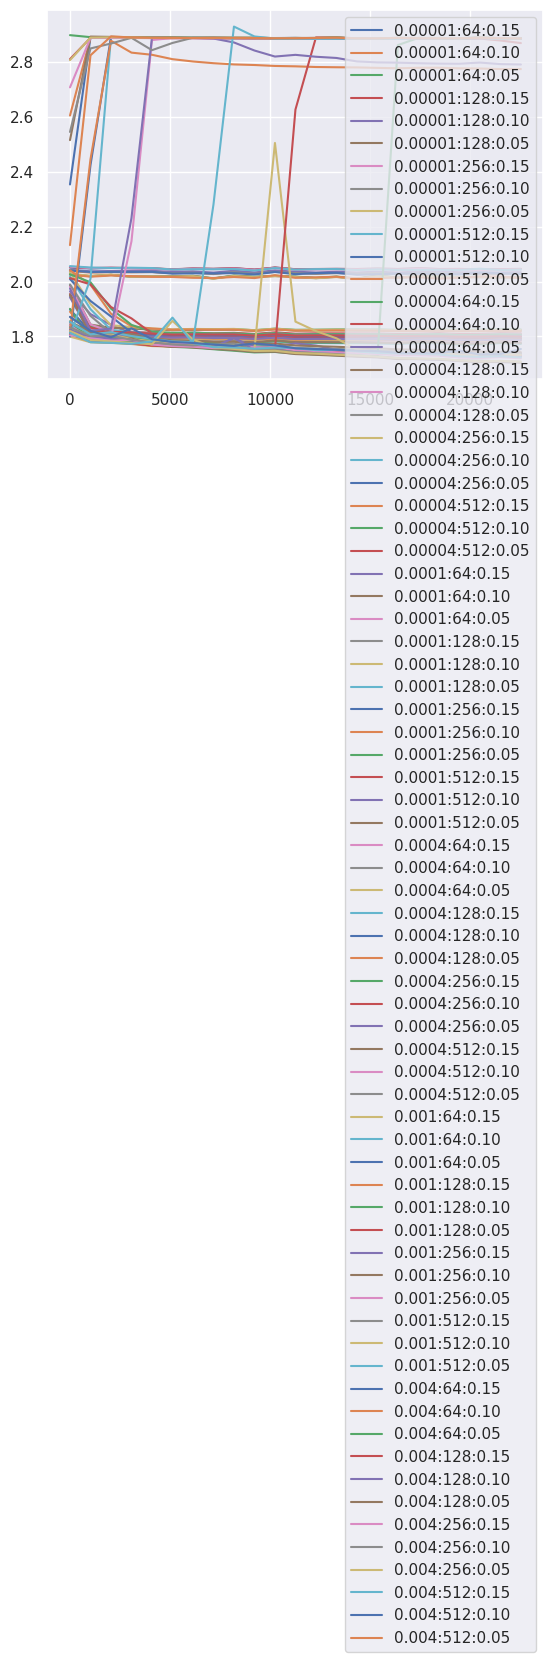

In [4]:
keys = []
best_validation_loss = []

for lr in LRs:
    for bs in BSs:
        for p in Ps:
            file = f"./models/hps/LR{lr}_BS{bs}_P{p}/metrics.bin"
            if os.path.isfile(file):
                keys.append((lr, bs, p))
                metrics = torch.load(file)
                mean_window = 1024
                data = torch.tensor(metrics["training/loss/step"])
                try:
                    best_validation_loss.append(min(metrics["validation/loss/mean"]))
                except:
                    best_validation_loss.append(float("inf"))
                x = torch.arange(0, len(data), mean_window)
                y = [torch.mean(data[i:i+mean_window]).item() for i in range(0, len(data), mean_window)]
                sns.lineplot(x=x, y=y, label=f"{lr}:{bs}:{p}")
best_validation_loss = torch.tensor(best_validation_loss)

In [5]:
[(keys[i], best_validation_loss[i]) for i  in torch.argsort(best_validation_loss)]

[(('0.001', '256', '0.05'), tensor(1.7515)),
 (('0.0004', '128', '0.05'), tensor(1.7522)),
 (('0.0004', '512', '0.05'), tensor(1.7522)),
 (('0.0004', '256', '0.05'), tensor(1.7529)),
 (('0.001', '256', '0.10'), tensor(1.7532)),
 (('0.0004', '64', '0.05'), tensor(1.7532)),
 (('0.001', '128', '0.10'), tensor(1.7534)),
 (('0.0004', '128', '0.10'), tensor(1.7534)),
 (('0.0004', '256', '0.10'), tensor(1.7537)),
 (('0.001', '512', '0.10'), tensor(1.7554)),
 (('0.0004', '64', '0.10'), tensor(1.7563)),
 (('0.0004', '512', '0.10'), tensor(1.7571)),
 (('0.001', '512', '0.05'), tensor(1.7578)),
 (('0.001', '128', '0.05'), tensor(1.7588)),
 (('0.0001', '128', '0.05'), tensor(1.7610)),
 (('0.0001', '64', '0.05'), tensor(1.7639)),
 (('0.004', '512', '0.10'), tensor(1.7644)),
 (('0.0001', '512', '0.05'), tensor(1.7646)),
 (('0.0001', '256', '0.05'), tensor(1.7651)),
 (('0.001', '256', '0.15'), tensor(1.7686)),
 (('0.001', '512', '0.15'), tensor(1.7705)),
 (('0.0001', '128', '0.10'), tensor(1.7717)),
